# MNIST digits classification dataset
with Keras

In [7]:
# import modules
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Reshape, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.optimizers import RMSprop, Adam
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data Load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

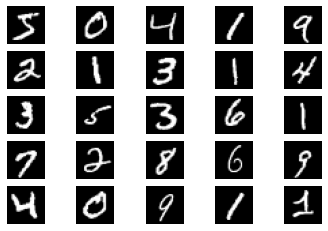

In [ ]:
# Data Visualization
fig, ax = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[5*i + j], cmap='gray')
        ax[i][j].axis('off')
plt.show()

In [3]:
# Data Preprocessing

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train.reshape((-1, 28, 28, 1))
x_test.reshape((-1, 28, 28, 1))

print(x_train[20][14])
print(x_train.shape)

[0.         0.         0.         0.         0.         0.
 0.6431373  0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.99215686 1.         0.99215686 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.3882353  0.         0.         0.
 0.         0.         0.         0.        ]
(60000, 28, 28)


In [9]:
# Create Model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)      

In [10]:
# Model Compile and Training

model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, batch_size=128, epochs=80, validation_split=0.2)

Epoch 1/80
375/375 [==============================] - 7s 17ms/step - loss: 0.2382 - acc: 0.9278 - val_loss: 1.4227 - val_acc: 0.4655
Epoch 2/80
375/375 [==============================] - 6s 17ms/step - loss: 0.0632 - acc: 0.9797 - val_loss: 0.0615 - val_acc: 0.9803
Epoch 3/80
375/375 [==============================] - 6s 16ms/step - loss: 0.0472 - acc: 0.9846 - val_loss: 0.0316 - val_acc: 0.9909
Epoch 4/80
375/375 [==============================] - 6s 17ms/step - loss: 0.0362 - acc: 0.9883 - val_loss: 0.0534 - val_acc: 0.9840
Epoch 5/80
375/375 [==============================] - 6s 16ms/step - loss: 0.0310 - acc: 0.9905 - val_loss: 0.0282 - val_acc: 0.9913
Epoch 6/80
375/375 [==============================] - 6s 16ms/step - loss: 0.0311 - acc: 0.9901 - val_loss: 0.0457 - val_acc: 0.9853
Epoch 7/80
375/375 [==============================] - 6s 16ms/step - loss: 0.0241 - acc: 0.9917 - val_loss: 0.0309 - val_acc: 0.9908
Epoch 8/80
375/375 [==============================] - 6s 16ms/step - 

In [11]:
def Plotting(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'bo', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
    plt.title('Trianing and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    plt.show()

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


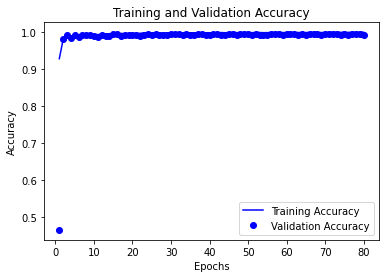

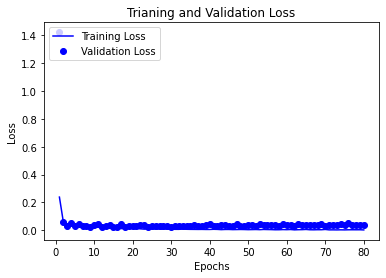

In [13]:
Plotting(history)

In [14]:
model.save('/content/drive/MyDrive/Colab Notebooks/MNIST_Keras_1.h5')

Epoch 1/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0160 - acc: 0.9951 - val_loss: 0.0336 - val_acc: 0.9908
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0157 - acc: 0.9949 - val_loss: 0.0334 - val_acc: 0.9916
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0152 - acc: 0.9950 - val_loss: 0.0340 - val_acc: 0.9916
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0147 - acc: 0.9952 - val_loss: 0.0322 - val_acc: 0.9922
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0145 - acc: 0.9953 - val_loss: 0.0329 - val_acc: 0.9918
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0147 - acc: 0.9955 - val_loss: 0.0319 - val_acc: 0.9923
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0156 - acc: 0.9951 - val_loss: 0.0322 - val_acc: 0.9915
Epoch 8/20
375/375 [==============================] - 2s 5ms/step - loss: 0.

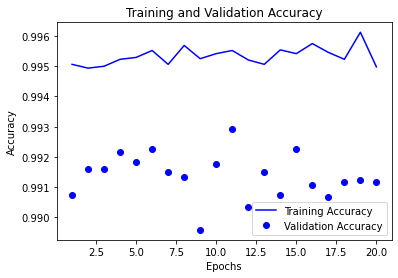

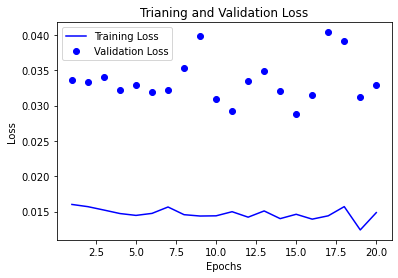

In [ ]:
history_2 = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)
Plotting(history_2)

In [15]:
preds_2 = model.evaluate(x_test, y_test)


print(preds_2)

313/313 [==============================] - 1s 4ms/step - loss: 0.0372 - acc: 0.9933
[0.03720388561487198, 0.9933000206947327]


In [16]:
final_model = model

In [ ]:
import os
from PIL import Image

source_dir = './drive/MyDrive/Colab Notebooks/Practice/Keras'
os.makedirs(os.path.join(source_dir, 'MNIST_Test'), exist_ok=True)

idx = np.random.randint(0, 10000, size=(40, ))
for i in idx:
    img = Image.fromarray(x_test[i], mode='L')
    img.save(os.path.join(source_dir, 'MNIST_Test', f'test_{i}.png'), 'png')

In [ ]:
x_Test = x_test[idx]
y_Test = y_test[idx]

test_pred = final_model.evaluate(x_Test, y_Test)
print(test_pred)

2/2 [==============================] - 0s 63ms/step - loss: 0.0113 - acc: 1.0000
[0.011271235533058643, 1.0]


In [17]:
import keras
import cv2
import os
import numpy as np
from keras.datasets import mnist

source_dir = "/content/drive/MyDrive/Colab Notebooks/Practice/Keras"

test_data = []
for i in range(1, 41):
    img = cv2.imread(os.path.join(source_dir, "MNIST_Test_data", f"{i}.png"))
    if type(img) == type(None):
        img = cv2.imread(os.path.join(source_dir, "MNIST_Test_data", f"{i}.PNG"))

    res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_NEAREST)
    img_Gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    test_data.append(img_Gray)

test_label = []

with open(os.path.join(source_dir, "MNIST_Test_label", "label.txt"), "r") as f:
    for line in f.readlines():
        test_label.append(int(line.rstrip()))

test_data = np.asarray(test_data).astype('float32') / 255
test_data = test_data.reshape((-1, 28, 28, 1))
test_label = np.array(test_label)

In [18]:
metrics = model.evaluate(test_data, test_label)
metrics

2/2 [==============================] - 0s 100ms/step - loss: 5.8877 - acc: 0.4250


[5.8876824378967285, 0.42500001192092896]

In [19]:
preds = model.predict(test_data)
print(np.argmax(preds, axis=1))
print(test_label)

2/2 [==============================] - 0s 7ms/step
[1 4 4 4 0 4 4 4 4 0 2 7 3 4 5 6 7 8 9 2 0 8 0 0 0 0 0 8 5 0 0 0 0 1 0 0 0
 6 5 6]
[1 9 8 7 6 5 4 2 3 0 2 1 3 4 5 6 7 8 9 9 7 3 2 3 1 2 6 8 5 5 2 4 7 1 2 3 0
 6 5 3]


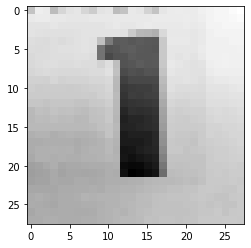

In [20]:
plt.imshow(test_data[0], cmap='gray')

In [ ]:
test_data[0][5]

array([[0.8784314 ],
       [0.88235295],
       [0.88235295],
       [0.8862745 ],
       [0.8862745 ],
       [0.8862745 ],
       [0.8901961 ],
       [0.8901961 ],
       [0.80784315],
       [0.52156866],
       [0.53333336],
       [0.5529412 ],
       [0.5568628 ],
       [0.5529412 ],
       [0.5529412 ],
       [0.54901963],
       [0.6627451 ],
       [0.9019608 ],
       [0.9019608 ],
       [0.9019608 ],
       [0.9098039 ],
       [0.90588236],
       [0.92941177],
       [0.92941177],
       [0.92941177],
       [0.92941177],
       [0.92941177],
       [0.92941177]], dtype=float32)

In [21]:
# 실제로 찍은 사진인 1~9 번과 인터넷에서 가져온 사진 중, 글자가 흰색이 아닌 검은색인 사진이 20~40번임
# 글자가 흰색이고 배경이 검은색인 데이터로 학습했으므로 위의 데이터를 잘 구분하지 못하는 것을 확인
# 그래서 아래와 같이 흰색과 검은색의 정규화 후 임의의 중간값인 0.71을 기준으로 잡고 기준에 대해 값을 반전시킴

for k in range(9):
    for i in range(28):
        for j in range(28):
            if test_data[k][i][j] < 0.71:
                test_data[k][i][j] = 0.71*2 - test_data[k][i][j]
            else:
                test_data[k][i][j] = 0.71 - (test_data[k][i][j] - 0.71)

for k in range(19, 40):
    for i in range(28):
        for j in range(28):
            if test_data[k][i][j] < 0.71:
                test_data[k][i][j] = 0.71*2 - test_data[k][i][j]
            else:
                test_data[k][i][j] = 0.71 - (test_data[k][i][j] - 0.71)

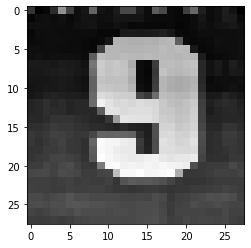

In [22]:
plt.imshow(test_data[1], cmap='gray')

In [23]:
pred = model.predict(test_data)
print(np.argmax(pred, axis=1))
print(test_label)

2/2 [==============================] - 0s 6ms/step
[1 4 4 4 4 4 4 4 4 0 2 7 3 4 5 6 7 8 9 8 8 8 0 8 1 0 0 8 0 6 0 4 7 1 0 8 0
 0 0 8]
[1 9 8 7 6 5 4 2 3 0 2 1 3 4 5 6 7 8 9 9 7 3 2 3 1 2 6 8 5 5 2 4 7 1 2 3 0
 6 5 3]


In [24]:
preds = model.evaluate(test_data, test_label)
preds

2/2 [==============================] - 0s 8ms/step - loss: 5.3398 - acc: 0.4250


[5.339840888977051, 0.42500001192092896]